In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import fetch_lfw_people
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=80)
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


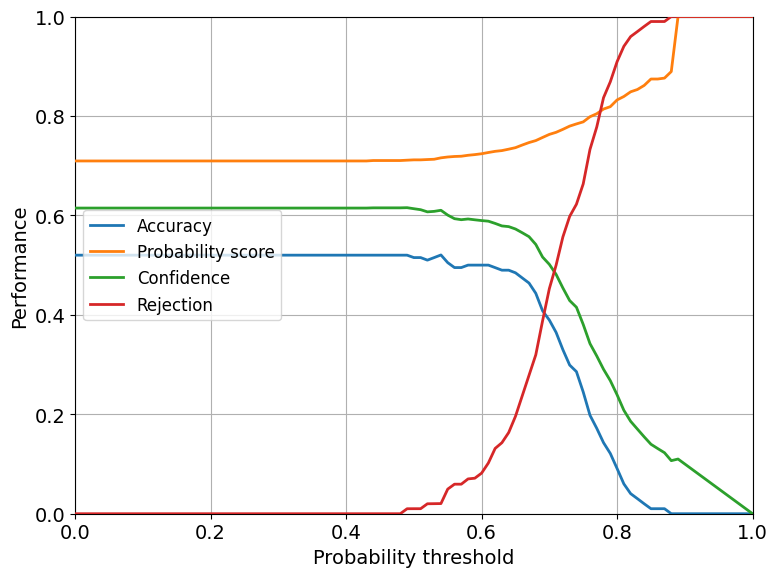


Best probability threshold value: 0.49
accuracy 0.52
prob_score 0.711017
rejection 0.01
confidence 0.615509


In [4]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

                   precision    recall  f1-score   support

     Ariel Sharon       0.24      0.90      0.38        20
     Colin Powell       0.89      0.41      0.56        59
  Donald Rumsfeld       0.75      0.39      0.51        31
    George W Bush       0.77      0.71      0.74       133
Gerhard Schroeder       0.76      0.57      0.65        28
      Hugo Chavez       0.88      0.39      0.54        18
       Tony Blair       0.44      0.67      0.53        36
          Unknown       0.99      1.00      1.00       162

         accuracy                           0.74       487
        macro avg       0.72      0.63      0.61       487
     weighted avg       0.82      0.74      0.75       487


Confusion matrix:


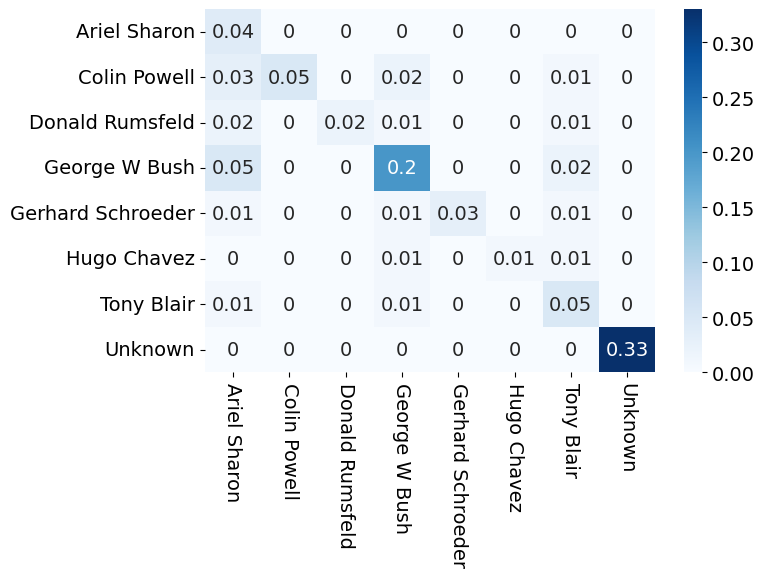


Index and Target label:
Index: 0 Label: Ariel Sharon
Index: 1 Label: Colin Powell
Index: 2 Label: Donald Rumsfeld
Index: 3 Label: George W Bush
Index: 4 Label: Gerhard Schroeder
Index: 5 Label: Hugo Chavez
Index: 6 Label: Tony Blair

Probability score threshold: 0.49
accuracy 0.752577
prob_score 0.723021
rejection 0.340206
confidence 0.737504


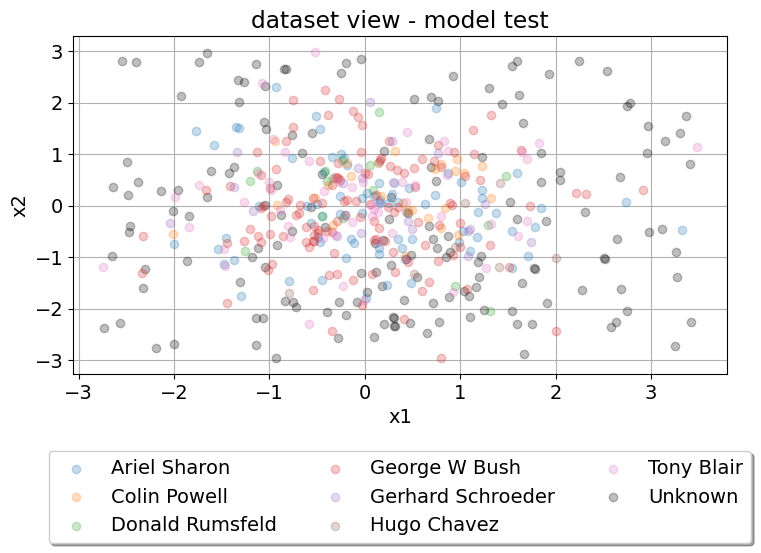

In [5]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'], target_names=ds_model['target_names'])
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)